import libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import data

In [4]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
df.keys()


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [23]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

### features :
- 'age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall'
### target :
- output

In [21]:
features = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
target = df[["output"]]

##### data types is DataFrame of pandas
### convert df to numpy array

In [22]:
features = features.values
target = target.values
target

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

### قرار دادن مقادیر دیتا بین 0و1

In [35]:
from sklearn.preprocessing import minmax_scale
features = minmax_scale(features)
features

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

### split the data to train & test & valid

In [36]:
from sklearn.model_selection import train_test_split
Xtrain,X_val_test,Ytrain,Y_val_test = train_test_split(features,target,test_size=0.3)
Xtest,Xval,Ytest,Yval = train_test_split(X_val_test,Y_val_test,test_size=0.5)


# building the Neural Network

In [78]:
import tensorflow as tf
from keras.layers import Dense , Dropout

model = tf.keras.Sequential()
model.add(Dense(10,activation="relu",input_shape=(Xtrain.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2,activation="sigmoid"))

In [79]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["accuracy"]
)

In [84]:
trained_model = model.fit(Xtrain,Ytrain,batch_size=32,validation_data=(Xval,Yval),epochs=500)

Epoch 1/500
7/7 [==============================] - 0s 11ms/step - loss: 0.1535 - accuracy: 0.3632 - val_loss: 0.1292 - val_accuracy: 0.1739
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.3868 - val_loss: 0.1288 - val_accuracy: 0.1739
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.3962 - val_loss: 0.1296 - val_accuracy: 0.1957
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1545 - accuracy: 0.4245 - val_loss: 0.1296 - val_accuracy: 0.1739
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1478 - accuracy: 0.4198 - val_loss: 0.1276 - val_accuracy: 0.1739
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1471 - accuracy: 0.4292 - val_loss: 0.1247 - val_accuracy: 0.1522
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.3726 - val_loss: 0.1220 - val_accuracy: 0.1522
Epoch 8/500
7/7 [=========

In [85]:
history =trained_model.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

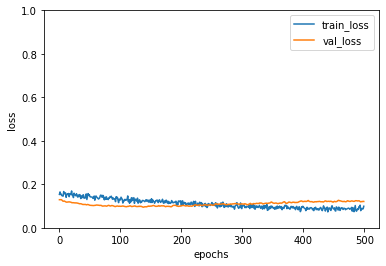

In [86]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim((0,1))
plt.legend(["train_loss","val_loss"])
plt.show()

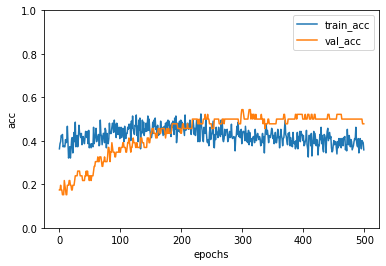

In [87]:
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.ylim((0,1))
plt.legend(["train_acc","val_acc"],loc="upper right")
plt.show()